## 1. Basic Pandas Operations

### Importing all the required Libraries

In [29]:


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

import warnings

warnings.filterwarnings('ignore')

###loading the dataset

In [30]:
drive.mount('/content/drive', force_remount=True)
path= "/content/drive/My Drive/informatics/1518854-Classification_Project (1)/Task - 3 (Apply Classification Algorithm)/train.csv"
data= pd.read_csv(path)
data.head()

Mounted at /content/drive


,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [31]:
data.shape

(10000, 15)

###Data includes 10000 rows and 15 features

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

###Holding policy duration, holding policy type and health indicator shows object data type and all the remaining features are of numeric data type

In [33]:
data['Holding_Policy_Type'].value_counts()

3.0    2573
1.0    1602
2.0     973
4.0     798
Name: Holding_Policy_Type, dtype: int64

In [34]:
data['Holding_Policy_Duration'].value_counts()

14+    898
1      867
2      790
3      696
4      530
5      461
6      374
7      320
8      254
9      205
10     166
12     104
13     103
14      89
11      89
Name: Holding_Policy_Duration, dtype: int64

In [35]:
data['Health Indicator'].value_counts()

X1    2559
X2    2028
X3    1344
X4    1090
X5     343
X6     248
X7      34
X8      13
X9      12
Name: Health Indicator, dtype: int64

## 2. Cleaning the Data

In [36]:
data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mean(),inplace=True)

#### Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

In [37]:
v=data['Health Indicator'].mode()[0]
for i in range(0,len(data['Health Indicator'])):
  if pd.isnull(data['Health Indicator'][i]):
    data['Health Indicator'][i]=v

for i in range(0,len(data['Holding_Policy_Duration'])):
  val=data.Holding_Policy_Duration[i]
  if val!='NaN':
    if val=='14+':
      data.Holding_Policy_Duration[i]=14
    else:
      data.Holding_Policy_Duration[i]=pd.to_numeric(data.Holding_Policy_Duration[i],downcast='integer')
      
data['Holding_Policy_Duration'].fillna(data['Holding_Policy_Duration'].mean(),inplace=True)

#### Converting Holding_Policy_Duration from object column  into int data type

In [38]:
cols=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
for col in cols:
  print(data[col].value_counts())
  print('-----------------------')

for col in cols:
  data[col]=data[col].apply(lambda x:0 if x==data[col].unique()[0] else 1)

cols=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
for col in cols:
  print(data[col].value_counts())
  print('-------------------------------')

Owned     5509
Rented    4491
Name: Accomodation_Type, dtype: int64
-----------------------
Individual    7956
Joint         2044
Name: Reco_Insurance_Type, dtype: int64
-----------------------
No     8318
Yes    1682
Name: Is_Spouse, dtype: int64
-----------------------
0    5509
1    4491
Name: Accomodation_Type, dtype: int64
-------------------------------
0    7956
1    2044
Name: Reco_Insurance_Type, dtype: int64
-------------------------------
0    8318
1    1682
Name: Is_Spouse, dtype: int64
-------------------------------


 Accomodation_Type, Reco_Insurance_Type, Is_Spouse  columns have two values - categories

In [39]:
for col in data.columns:
  if data[col].nunique()>2 and data[col].dtype=='object':
    print('{} dtype is: {}'.format(col,data[col].dtype))
    print('-------------------------------------------------------')

City_Code dtype is: object
-------------------------------------------------------
Health Indicator dtype is: object
-------------------------------------------------------


In [40]:

data.select_dtypes(exclude='object')

,Unnamed: 0,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,64,0,0,36,36,0,14.000000,2.000000,16,13320.0,0
1,33499,33500,2955,0,0,66,66,0,10.000000,1.000000,19,16152.0,0
2,7997,7998,1542,1,0,24,24,0,3.000000,1.000000,16,7310.0,0
3,33032,33033,772,1,0,75,75,0,1.000000,3.000000,16,15792.0,0
4,30516,30517,1510,0,1,59,58,1,14.000000,4.000000,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,13,0,1,47,40,1,6.115876,2.431719,19,27840.0,1
9996,35448,35449,1477,1,0,34,34,0,6.000000,1.000000,4,10560.0,0
9997,47253,47254,2357,0,0,64,64,0,8.000000,2.000000,19,14716.0,0
9998,42544,42545,1443,1,0,53,53,0,14.000000,3.000000,13,11664.0,0


In [41]:
data['Response'].describe()

count    10000.000000
mean         0.245900
std          0.430641
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Response, dtype: float64

In [42]:
# Dropping unknown column
data.drop('Unnamed: 0',axis=1,inplace=True)

data.shape



(10000, 14)

In [43]:
# Getting all the Object Dtypes

data.select_dtypes(include='object')

,City_Code,Health Indicator
0,C3,X1
1,C3,X6
2,C1,X1
3,C26,X1
4,C2,X1
...,...,...
9995,C3,X5
9996,C5,X1
9997,C1,X1
9998,C1,X5


In [44]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,0,0,36,36,0,X1,14.0,2.0,16,13320.0,0
1,33500,C3,2955,0,0,66,66,0,X6,10.0,1.0,19,16152.0,0
2,7998,C1,1542,1,0,24,24,0,X1,3.0,1.0,16,7310.0,0
3,33033,C26,772,1,0,75,75,0,X1,1.0,3.0,16,15792.0,0
4,30517,C2,1510,0,1,59,58,1,X1,14.0,4.0,17,23673.0,0


#Observations

*

# Univariate Analysis

In [45]:
categorical_cols=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']
numeric_cols=['Upper_Age','Lower_Age','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Premium']

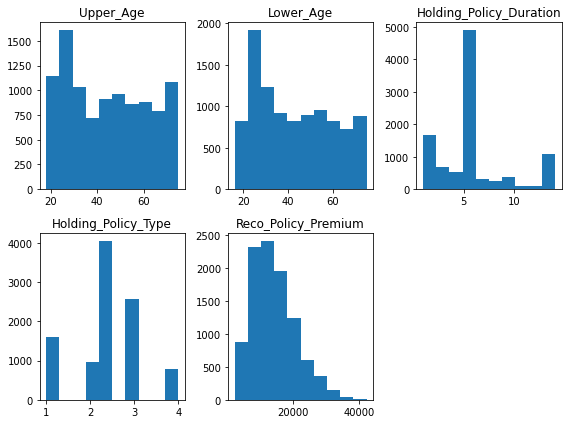

In [46]:
plt.figure(figsize=(8,6))
for i,col in enumerate(numeric_cols):
  plt.subplot(2,3,i+1)
  plt.title(col)
  plt.hist(data[col])
  plt.tight_layout()

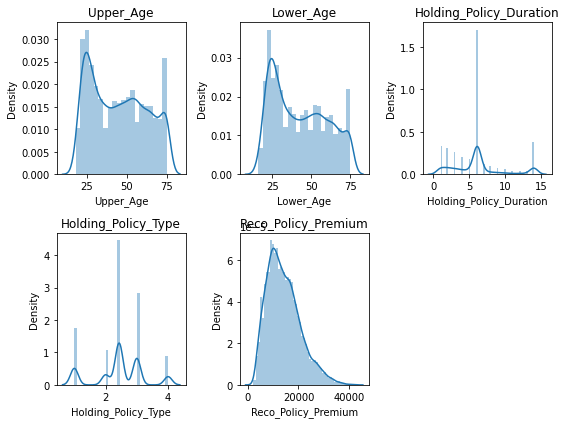

In [47]:
plt.figure(figsize=(8,6))
for i,col in enumerate(numeric_cols):
  plt.subplot(2,3,i+1)
  plt.title(col)
  sns.distplot(data[col])
  plt.tight_layout()

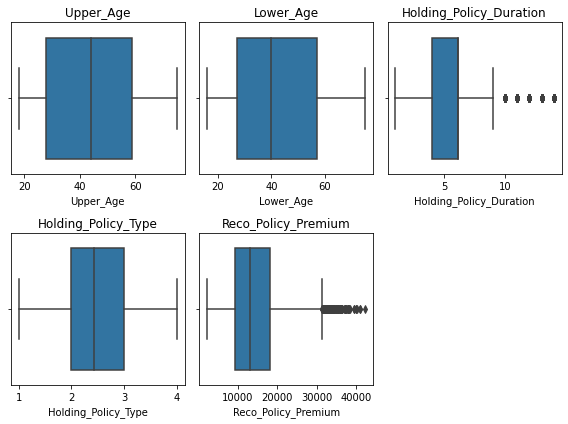

In [48]:
plt.figure(figsize=(8,6))
for i,col in enumerate(numeric_cols):
  plt.subplot(2,3,i+1)
  plt.title(col)
  sns.boxplot(data[col])
  plt.tight_layout()

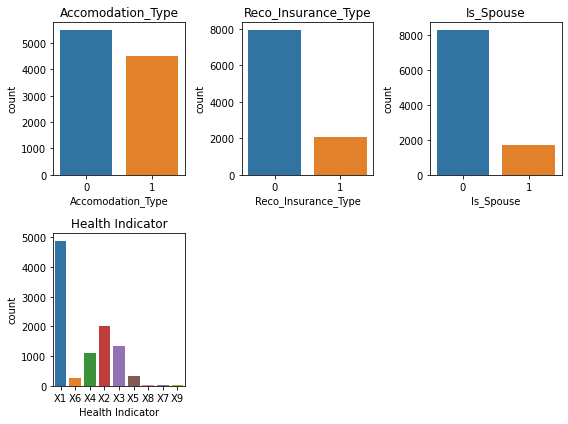

In [49]:
plt.figure(figsize=(8,6))
for i,col in enumerate(categorical_cols[:-1]):
  plt.subplot(2,3,i+1)
  plt.title(col)
  sns.countplot(data[col])
  plt.tight_layout()

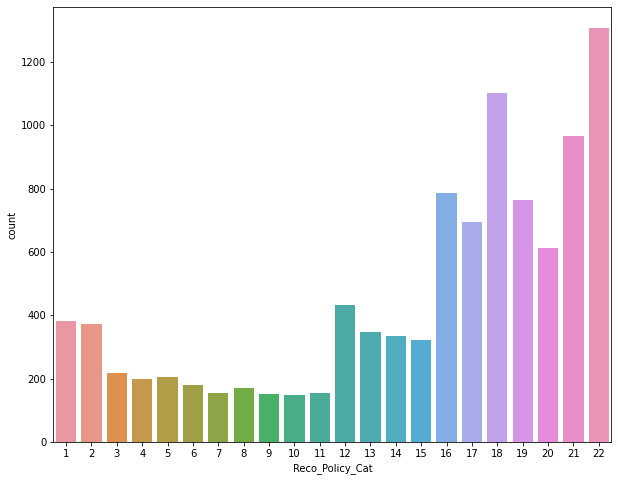

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(data['Reco_Policy_Cat'])

#Bivariate Analysis

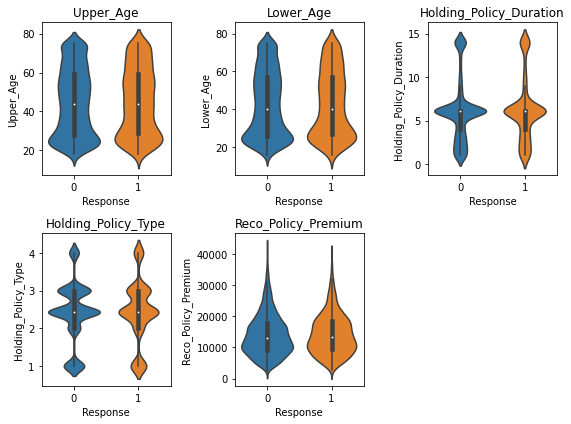

In [51]:
plt.figure(figsize=(8,6))
for i,col in enumerate(numeric_cols):
  plt.subplot(2,3,i+1)
  plt.title(col)
  sns.violinplot(data['Response'],data[col])
  plt.tight_layout()

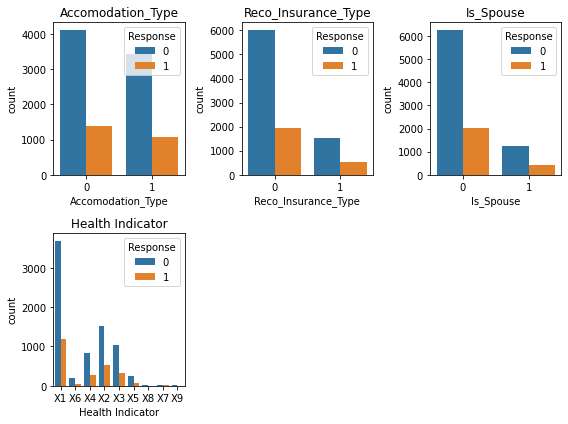

In [52]:
plt.figure(figsize=(8,6))
for i,col in enumerate(categorical_cols[:-1]):
  plt.subplot(2,3,i+1)
  plt.title(col)
  sns.countplot(data[col],hue=data['Response'])
  plt.tight_layout()

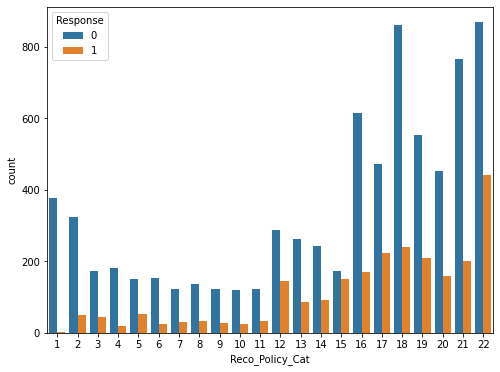

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(data['Reco_Policy_Cat'],hue=data['Response'])

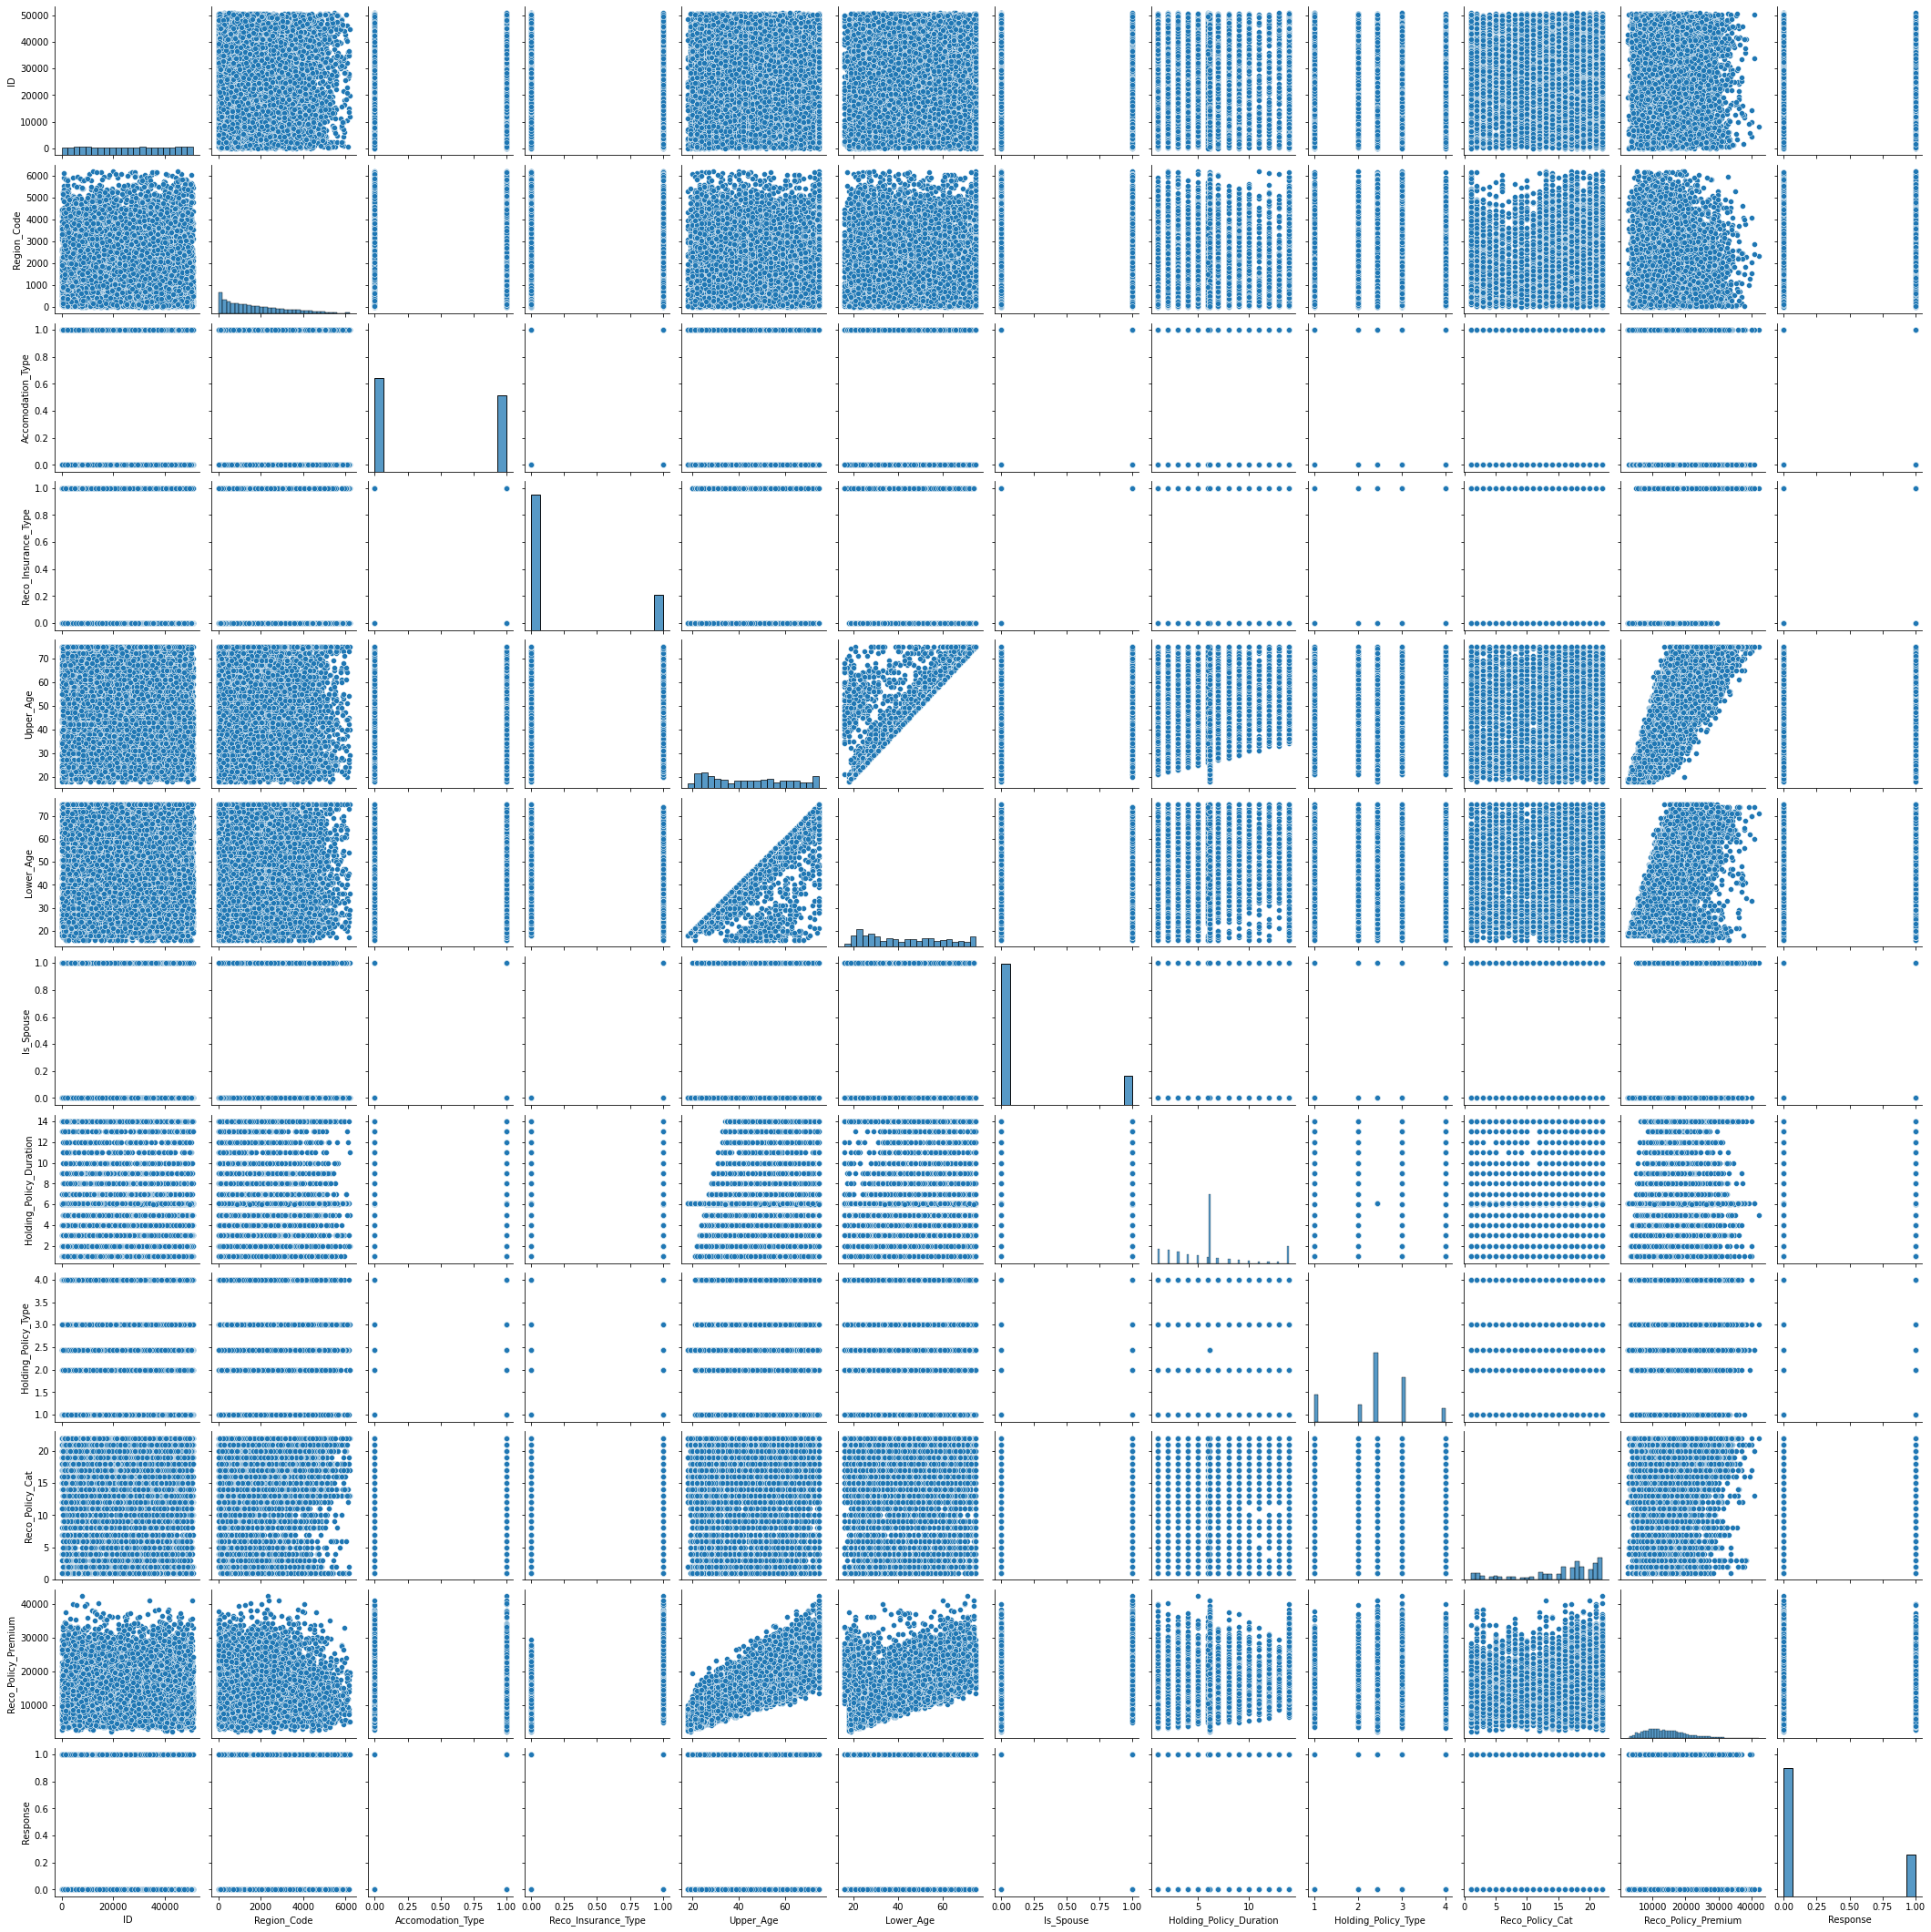

In [54]:
sns.pairplot(data)

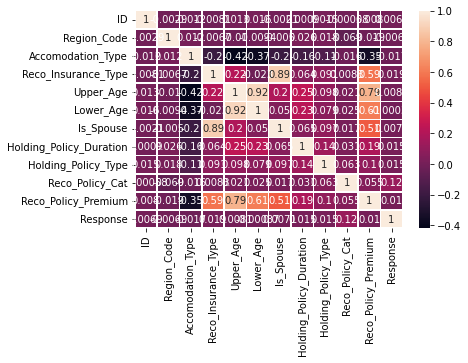

In [55]:
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

OBSERVATIONS
* Reco_Policy_Premium follows nearly normal distribution 
* Other features don't follow normal distribution
* more than 5000 customers has own house and around 4000 customers live in rented house

* 8000 customers took individual Insurance Type and 2000 customers took joint Insurance Type

* 8000 customers were not married and less than 2000 customers were married

* Among all the types of Health Indicators 'X1' has the maximum count of 5000
* Among all the Recommended Policies 22nd category has the maximum count of 14000
* Lower Age and Upper Age features are highly correlated 
* Lower Age and Recommended Policy Category, Upper Age and Recommended Policy category are highly correlated
* None of the features are correlated with target variable 'Response'

In [56]:
cols=['Health Indicator','City_Code','Reco_Policy_Cat']

df_encoded=pd.get_dummies(data[cols],drop_first=True)


### Encoding the categorical features

In [57]:
# Concatinating the original data frame and onehot encoded dataframe

data=pd.concat([data,df_encoded],axis=1)

In [58]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe
data.drop(cols,axis=1,inplace=True)
data.head()

data.drop(['ID','Region_Code'],axis=1,inplace=True)

In [59]:
y=data['Response']
x=data.drop('Response',axis=1)

###Standardizing the data

In [60]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_sc=sc.fit_transform(x)

Splitting the data into train and test 

In [61]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test = train_test_split(x_sc,y,test_size=0.2,random_state=123)

###sampling the target variable

In [62]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(),step=1)
# fit RFE
rfe=rfe.fit(x_train_1, y_train_1)

x_train_rfe=rfe.transform(x_train_1)
x_test=rfe.transform(x_test_1)

In [63]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy=0.5,random_state=123)


x_train,y_train=rus.fit_resample(x_train_rfe,y_train_1)

### Model Building 


#importing Libraries

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

Logistic Regression

In [65]:
lr= LogisticRegression(random_state=123)
lr.fit(x_train,y_train)


LogisticRegression(random_state=123)

Support Vector Classifier

In [66]:
svc= svm.SVC(random_state=4323)
svc.fit(x_train,y_train)


SVC(random_state=4323)

KNN classifier

In [67]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Decision Tree Classifier

In [68]:
clf_tree=DecisionTreeClassifier(random_state=456)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=456)

Random Forest Classifier

In [69]:
rf_tree=RandomForestClassifier(random_state=432)
rf_tree.fit(x_train,y_train)

RandomForestClassifier(random_state=432)

Gradient Boost Classifier

In [70]:
gb_clf=GradientBoostingClassifier(random_state=234)
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=234)

Ada Boost Classifier

In [71]:
ad_clf=AdaBoostClassifier(random_state=2344)
ad_clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=2344)

Import Libraries

In [72]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,roc_curve,classification_report

In [73]:
accuracy=[]
F1_score=[]
Precision=[]
Recall=[]
models=[lr,svc,knn,clf_tree,rf_tree,gb_clf,ad_clf]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model in models:
  accuracy.append(accuracy_score(y_train,model.predict(x_train)))
  F1_score.append(f1_score(y_train,model.predict(x_train)))
  Precision.append(precision_score(y_train,model.predict(x_train)))
  Recall.append(recall_score(y_train,model.predict(x_train)))

metric={'Algorithm':algos,'Accuracy_Score':accuracy,'f1_score':F1_score,'Precision_score':Precision,'Recall_score':Recall}
metric=pd.DataFrame(metric)
metric

,Algorithm,Accuracy_Score,f1_score,Precision_score,Recall_score
0,Logistic Regression,0.666667,0.000000,0.000000,0.000000
1,Support Vector Classifier,0.673895,0.045276,0.938776,0.023197
2,K nearest Neighbor Classifier,0.729871,0.495130,0.656667,0.397378
3,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier,0.999832,0.999748,1.000000,0.999496
5,Gradient Boost Classifier,0.685493,0.109472,0.974576,0.057993
6,Ada Boost Classifier,0.668180,0.012012,0.800000,0.006051


In [74]:
accuracy=[]
F1_score=[]
Precision=[]
Recall=[]
models=[lr,svc,knn,clf_tree,rf_tree,gb_clf,ad_clf]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model in models:
  accuracy.append(accuracy_score(y_test,model.predict(x_test)))
  F1_score.append(f1_score(y_test,model.predict(x_test)))
  Precision.append(precision_score(y_test,model.predict(x_test)))
  Recall.append(recall_score(y_test,model.predict(x_test)))

metric={'Algorithm':algos,'Accuracy_Score':accuracy,'f1_score':F1_score,'Precision_score':Precision,'Recall_score':Recall}
metric=pd.DataFrame(metric)
metric

,Algorithm,Accuracy_Score,f1_score,Precision_score,Recall_score
0,Logistic Regression,0.7620,0.000000,0.000000,0.000000
1,Support Vector Classifier,0.7585,0.004124,0.111111,0.002101
2,K nearest Neighbor Classifier,0.6630,0.237557,0.257353,0.220588
3,Decision Tree Classifier,0.5945,0.292938,0.250373,0.352941
4,Random Forest Classifier,0.6890,0.150273,0.214844,0.115546
5,Gradient Boost Classifier,0.7540,0.031496,0.250000,0.016807
6,Ada Boost Classifier,0.7600,0.004149,0.166667,0.002101


In [77]:
models=[lr,svc,knn,clf_tree,rf_tree,gb_clf,ad_clf]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model,algo in zip(models,algos):
  print(algo)
  print(classification_report(y_test,model.predict(x_test)))
  print('-------------------------------------------------------')

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1524
           1       0.00      0.00      0.00       476

    accuracy                           0.76      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.58      0.76      0.66      2000

-------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1524
           1       0.11      0.00      0.00       476

    accuracy                           0.76      2000
   macro avg       0.44      0.50      0.43      2000
weighted avg       0.61      0.76      0.66      2000

-------------------------------------------------------
K nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1524
           1       0.26      0.22      0.24      

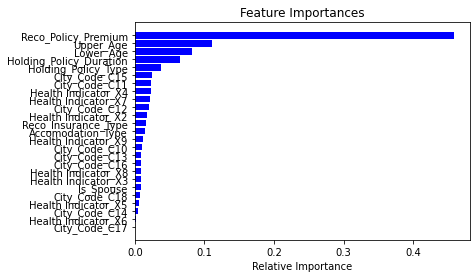

In [78]:
features = x.columns 
importances = gb_clf.feature_importances_ 
indices = np.argsort(importances)
plt.title('Feature Importances') 
plt.barh(range(len(indices)), importances[indices], color='b', align='center') 
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance') 
plt.show()

### Among all the algorithms Adaboost works best on both train and test data with 76% accuracy on test data

### Among all the features Recommended Policy premium has the highest importance in predicting a person's interest in insurance policy

### The project was limited by anonymity of the data